In [1]:
library('tidyverse')
options(repr.plot.width=4, repr.plot.height=3, repr.plot.res = 300)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Tiles

This is a dataset of otter skull morphology.

In [2]:
# uncomment the following:
otter.data = read.csv('https://jcoliver.github.io/learn-r/data/otter-mandible-data.csv') %>%
    gather(characteristic, value, -species, -museum, -accession)

otter.data %>% head

,species,museum,accession,characteristic,value
,<chr>,<chr>,<chr>,<chr>,<dbl>
1,A. cinerea,AMNH,101458,m1,15.100
2,A. cinerea,AMNH,101461,m1,12.740
3,A. cinerea,AMNH,101466,m1,12.425
4,A. cinerea,AMNH,101635,m1,13.400
5,A. cinerea,AMNH,101459,m1,14.400
6,A. cinerea,AMNH,101462,m1,14.525


Make a bar chart of the museum column. What is this chart telling you?

In [3]:
options(repr.plot.width=4, repr.plot.height=3, repr.plot.res = 300)

Make a heatmap of the data with `characteristic` on the x-axis and `species` on the y-axis.

In [4]:
#uncomment this to get a scaled version of the data:

 otter.data.scaled = otter.data %>%
     group_by(characteristic) %>%
     mutate(value.scaled = scales::rescale(value))

 otter.data.scaled %>% head

species,museum,accession,characteristic,value,value.scaled
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
A. cinerea,AMNH,101458,m1,15.100,0.27867699
A. cinerea,AMNH,101461,m1,12.740,0.11259676
A. cinerea,AMNH,101466,m1,12.425,0.09042928
A. cinerea,AMNH,101635,m1,13.400,0.15904293
A. cinerea,AMNH,101459,m1,14.400,0.22941590
A. cinerea,AMNH,101462,m1,14.525,0.23821253


In [5]:
options(repr.plot.width=5, repr.plot.height=2.5, repr.plot.res = 300)

What can you do to make the chart more visually appealing?
- make the `color` white
- use `scale_fill_gradient(low = "white", high = "steelblue")`

# Points with jitter

Let's stick with the otter data. We could also use a point+jitter plot to represent the data. Make a point+jitter plot below with species on the x-axis, value on the y-axis, and facet the chart by characteristic. 

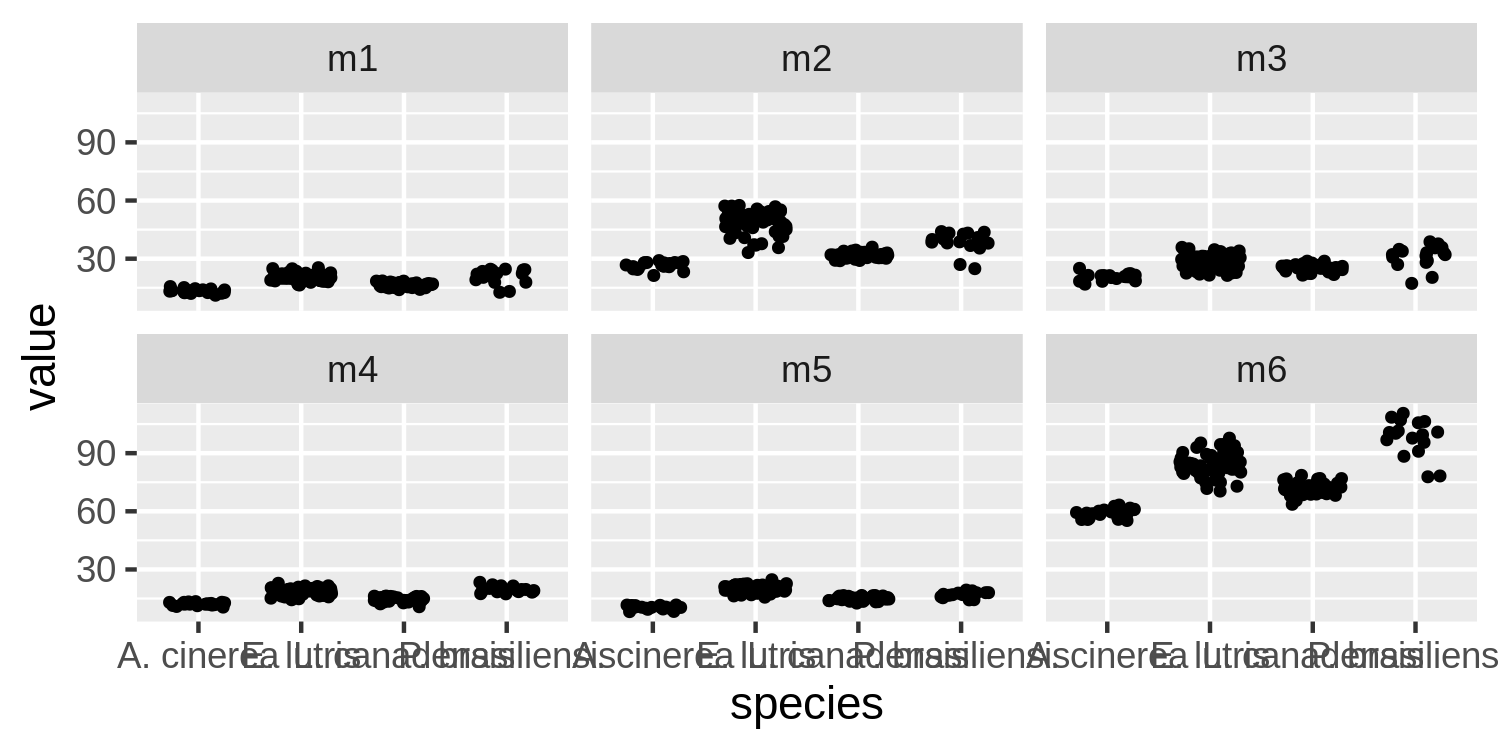

In [19]:
p = ggplot(otter.data, aes(x = species, y = value)) + 
        geom_point(na.rm = T, size =0.8) + 
        #this will resize the points to be a bit smaller
        facet_wrap(~characteristic)
p 

Warning message:
“Removed 5 rows containing missing values (geom_point).”
Warning message:
“Removed 5 rows containing missing values (geom_point).”
Warning message:
“Removed 5 rows containing missing values (geom_point).”
Warning message:
“Removed 5 rows containing missing values (geom_point).”
Warning message:
“Removed 5 rows containing missing values (geom_point).”


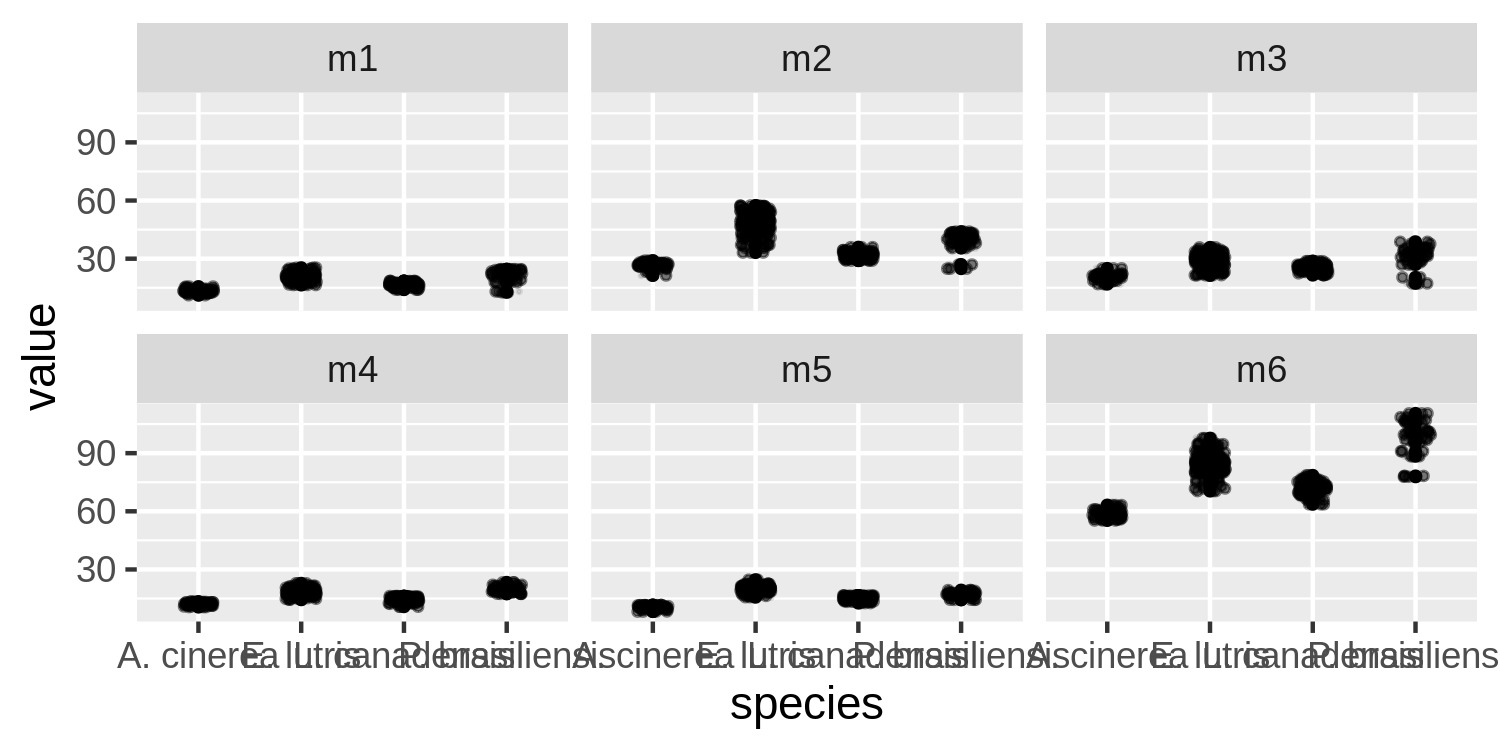

In [16]:
p = ggplot(otter.data, aes(x = species, y = value)) + 
        geom_point(na.rm = T, size =0.8, position = position_jitter(height =0, width = 0.3)) + 
        #this will jitter the points so there's less overlap 
        facet_wrap(~characteristic)
p 

List of 1
 $ axis.text.x:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : NULL
  ..$ hjust        : num 1
  ..$ vjust        : NULL
  ..$ angle        : num 45
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

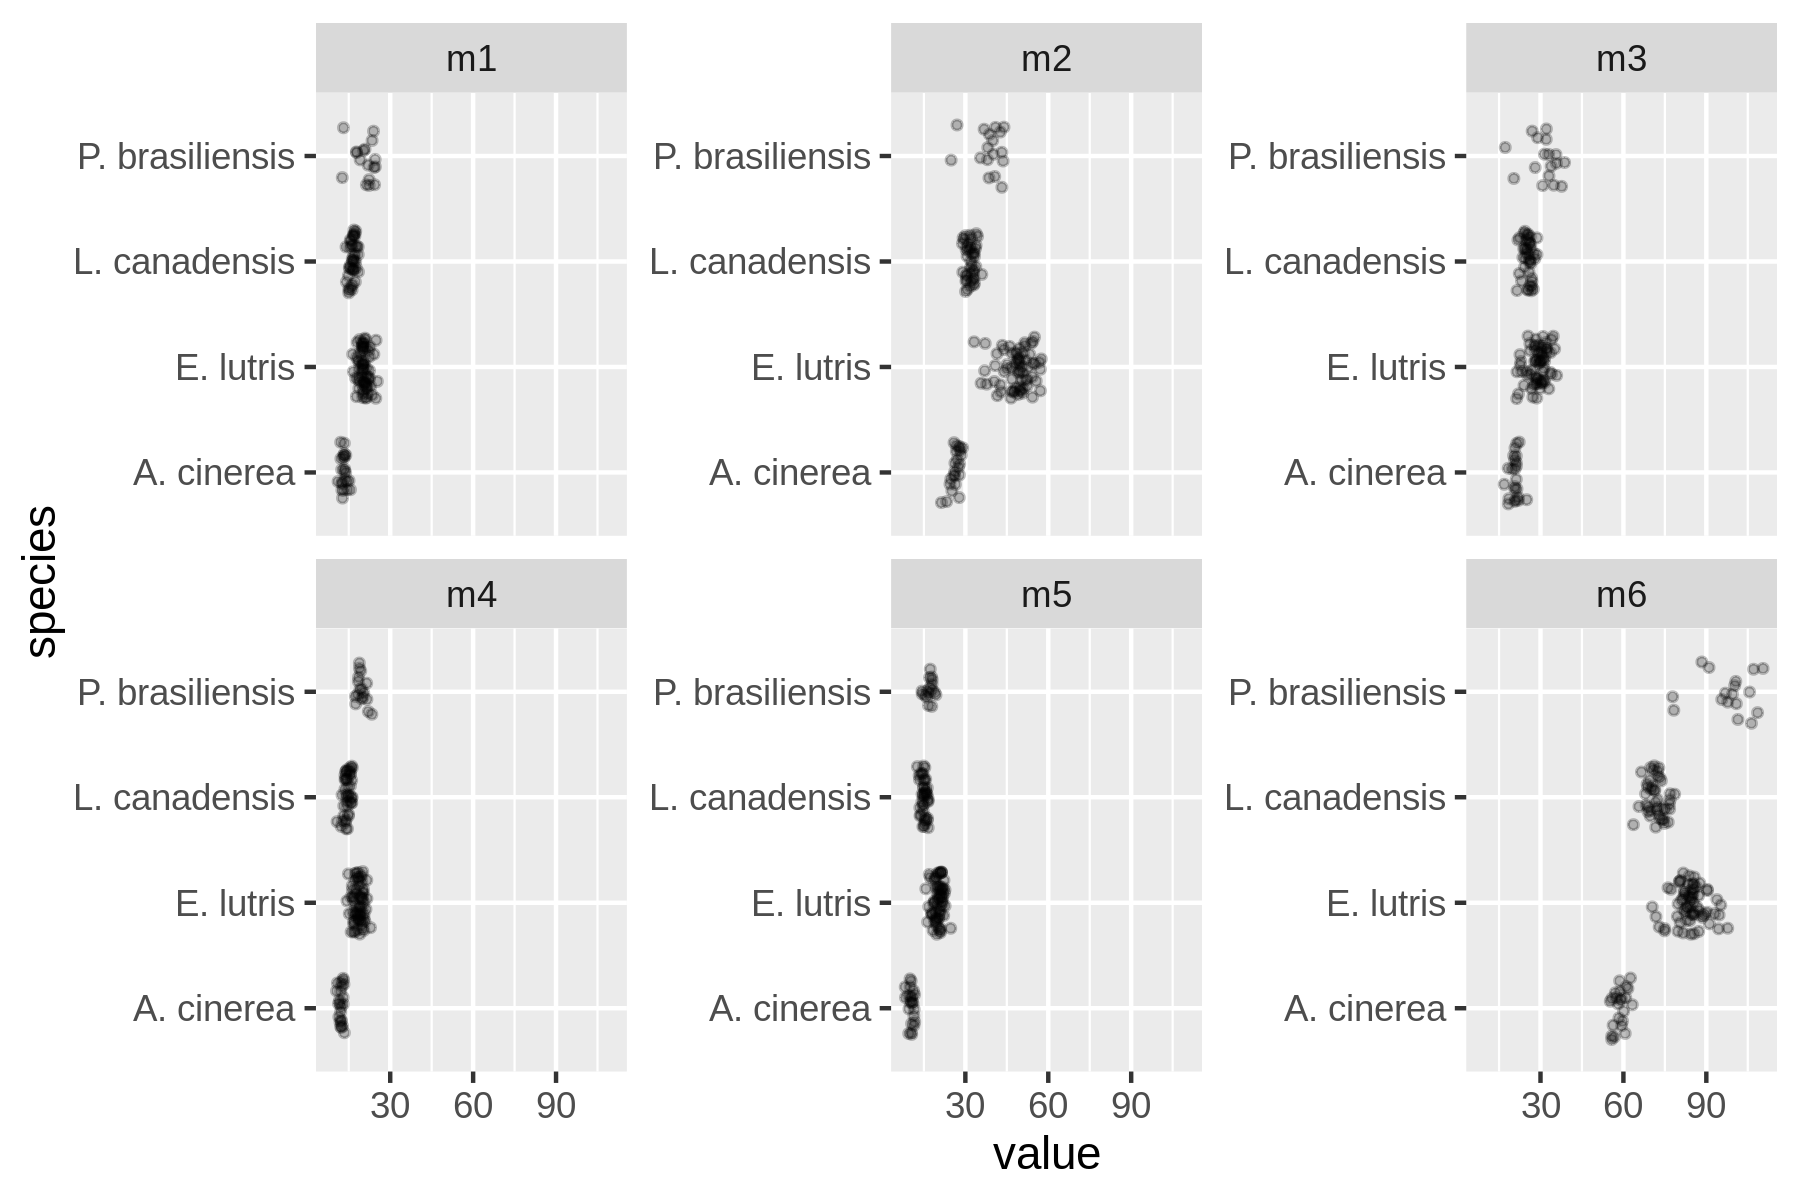

In [23]:
options(repr.plot.width=6, repr.plot.height=4, repr.plot.res = 300)

# we want the range for each plot to be different, so that each one represents the scale it's representing 
p = ggplot(otter.data, aes(x = species, y = value)) + 
        geom_point(na.rm = T, size =0.8, alpha = 0.25, position = position_jitter(height =0, width = 0.3)) + 
        facet_wrap(~characteristic, scales = 'free_y') + 
        #  this allows each chart to set it's own y axis 
        coord_flip()

#adjust the legends on the axes 
theme(axis.text.x = element_text(angle = 45, hjust =1))
p 


In [25]:
# now let's make a box plot with the same data - we could even overlap the points on top of the box plots! 
options(repr.plot.width=6, repr.plot.height=4, repr.plot.res=300)

p = ggplot(otter.data, aes(x = species, y = value)) +
    geom_boxplot(outlier.shape = NA) + 
    geom_point(na.rm = T, size = 0.8, alpha = 0.25, position = position_jitter(height = 0, width = 0.3)) + 
    facet_wrap(~characteristic, scales = 'free_y') + 
    theme(axis.text.t = element_text(angle = 45, hjust = 1)) 
p

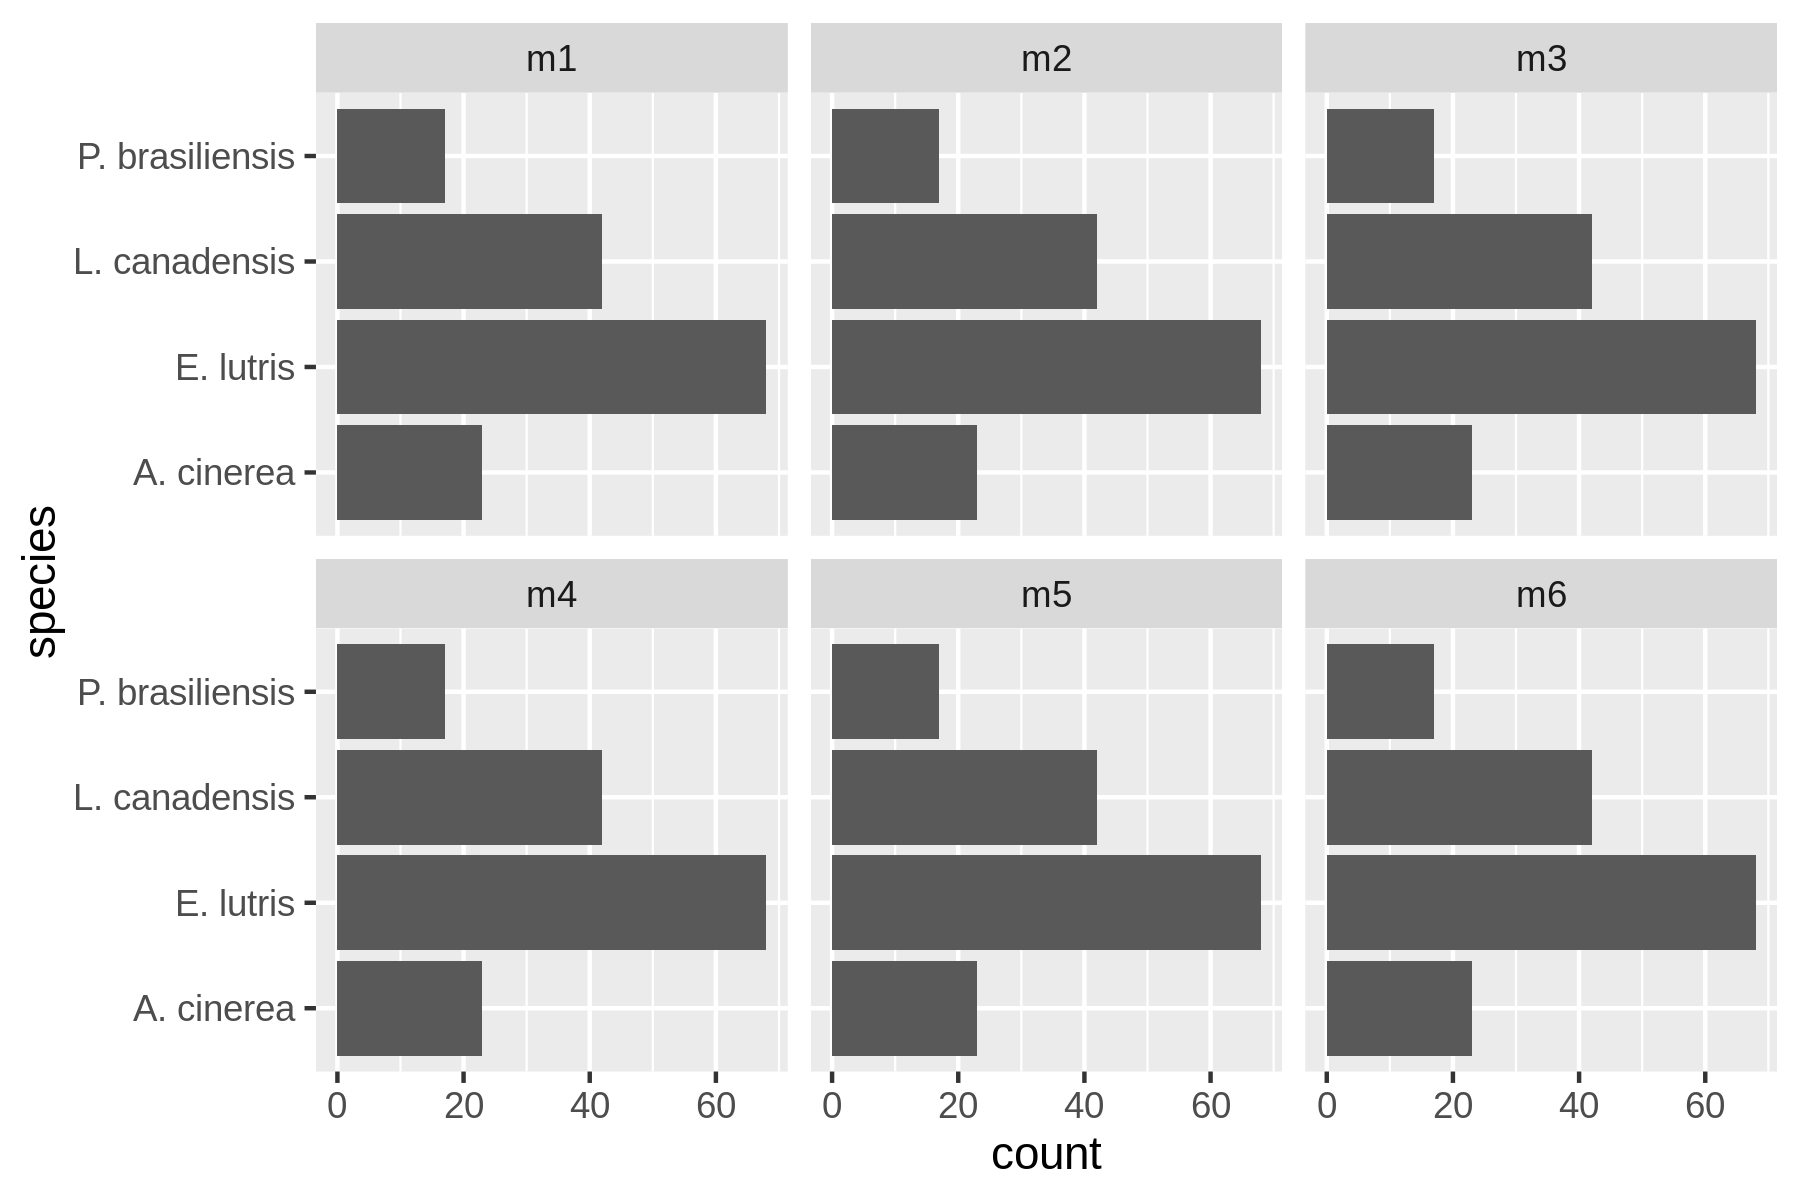

In [30]:
# make chart with species on y and 
p = ggplot(otter.data, aes(y = species))+ geom_bar() +
    facet_wrap(~characteristic)
p 


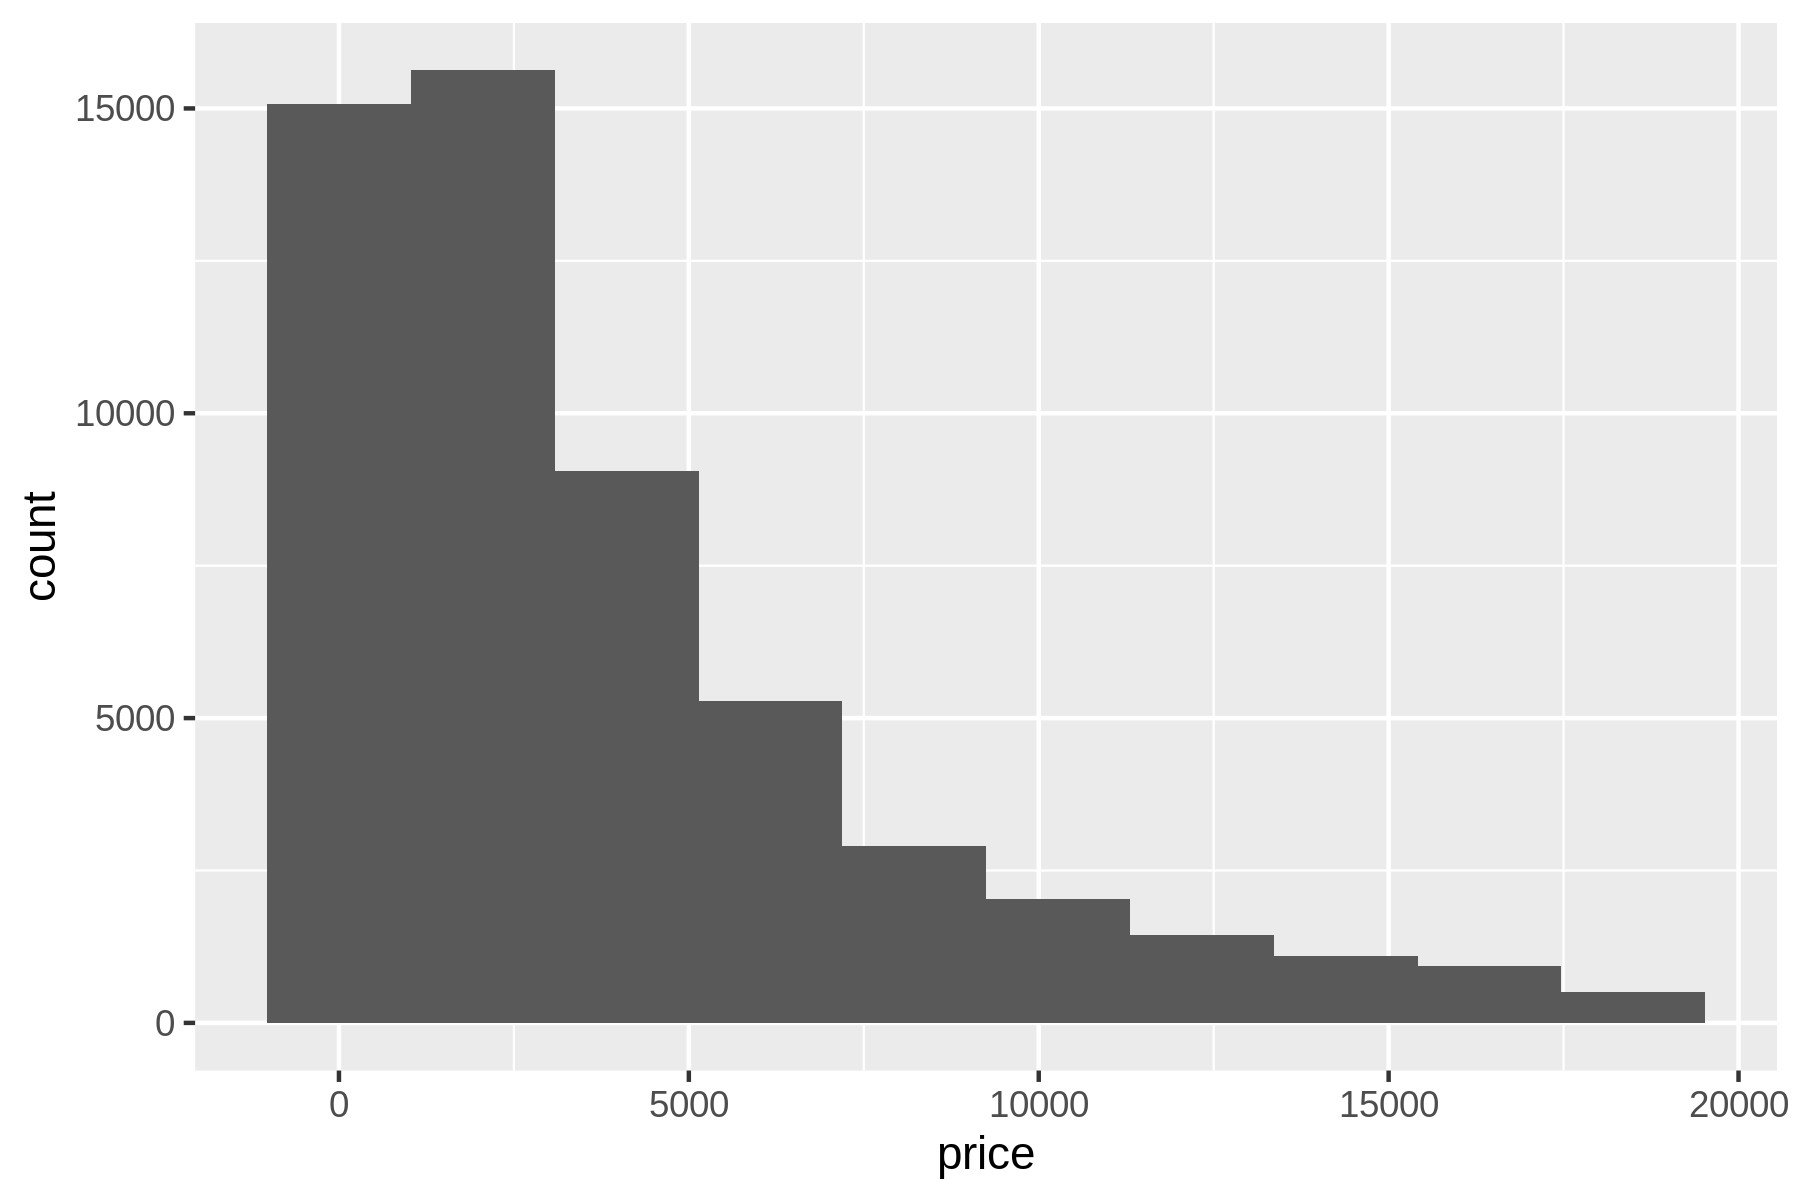

In [33]:
#histograms 
p = ggplot(diamonds, aes(x = price)) + geom_histogram(bins = 10)
# bins will adjust the number of bars (bins) in our data 
p 

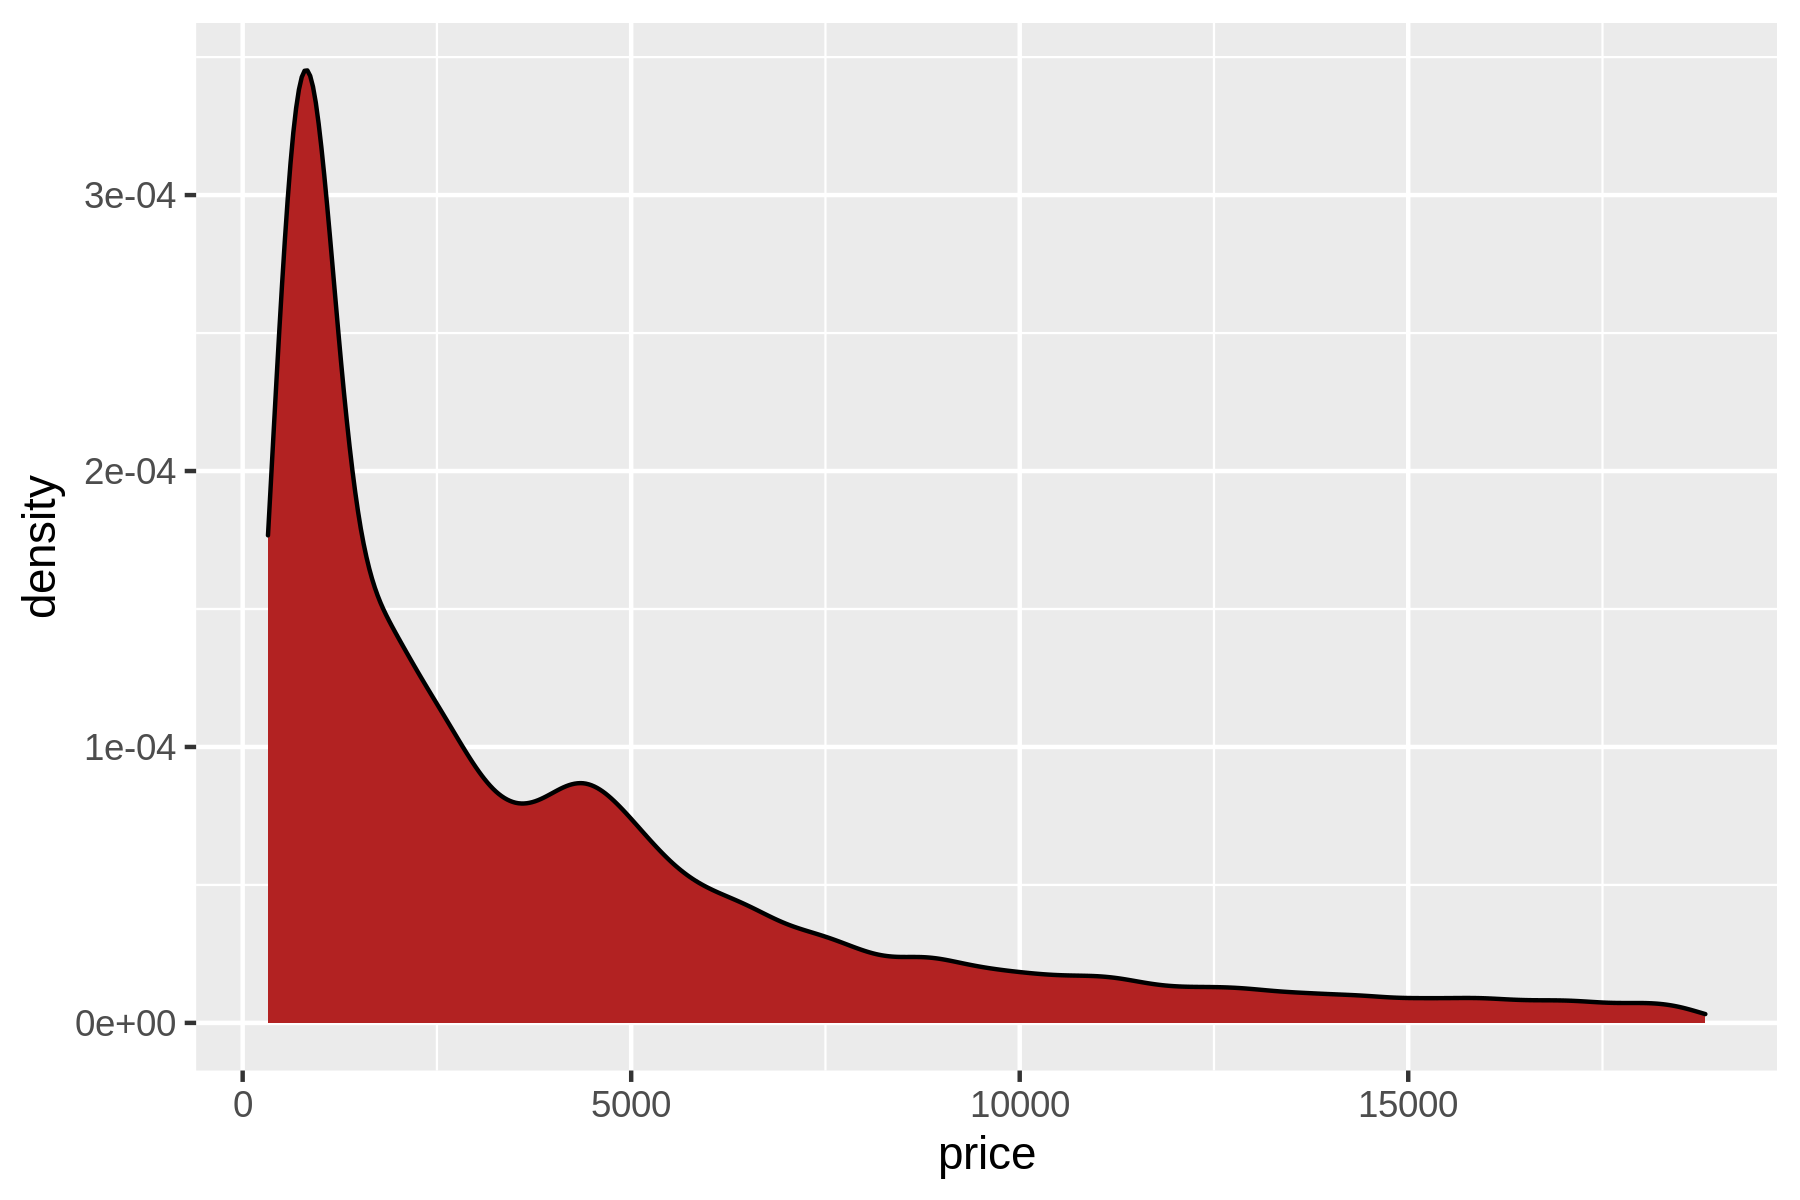

In [37]:
# We can create a graph of geom_density - the area under the curve will equal 1.
#this graph is called KDE. A normal distribution is computed for each point on the graph. The curve that we see is the sum of all the points on the distribution. 
p = ggplot(diamonds, aes(x = price)) 
p = p + geom_density(fill = 'firebrick') # we can add a fill color 
p 

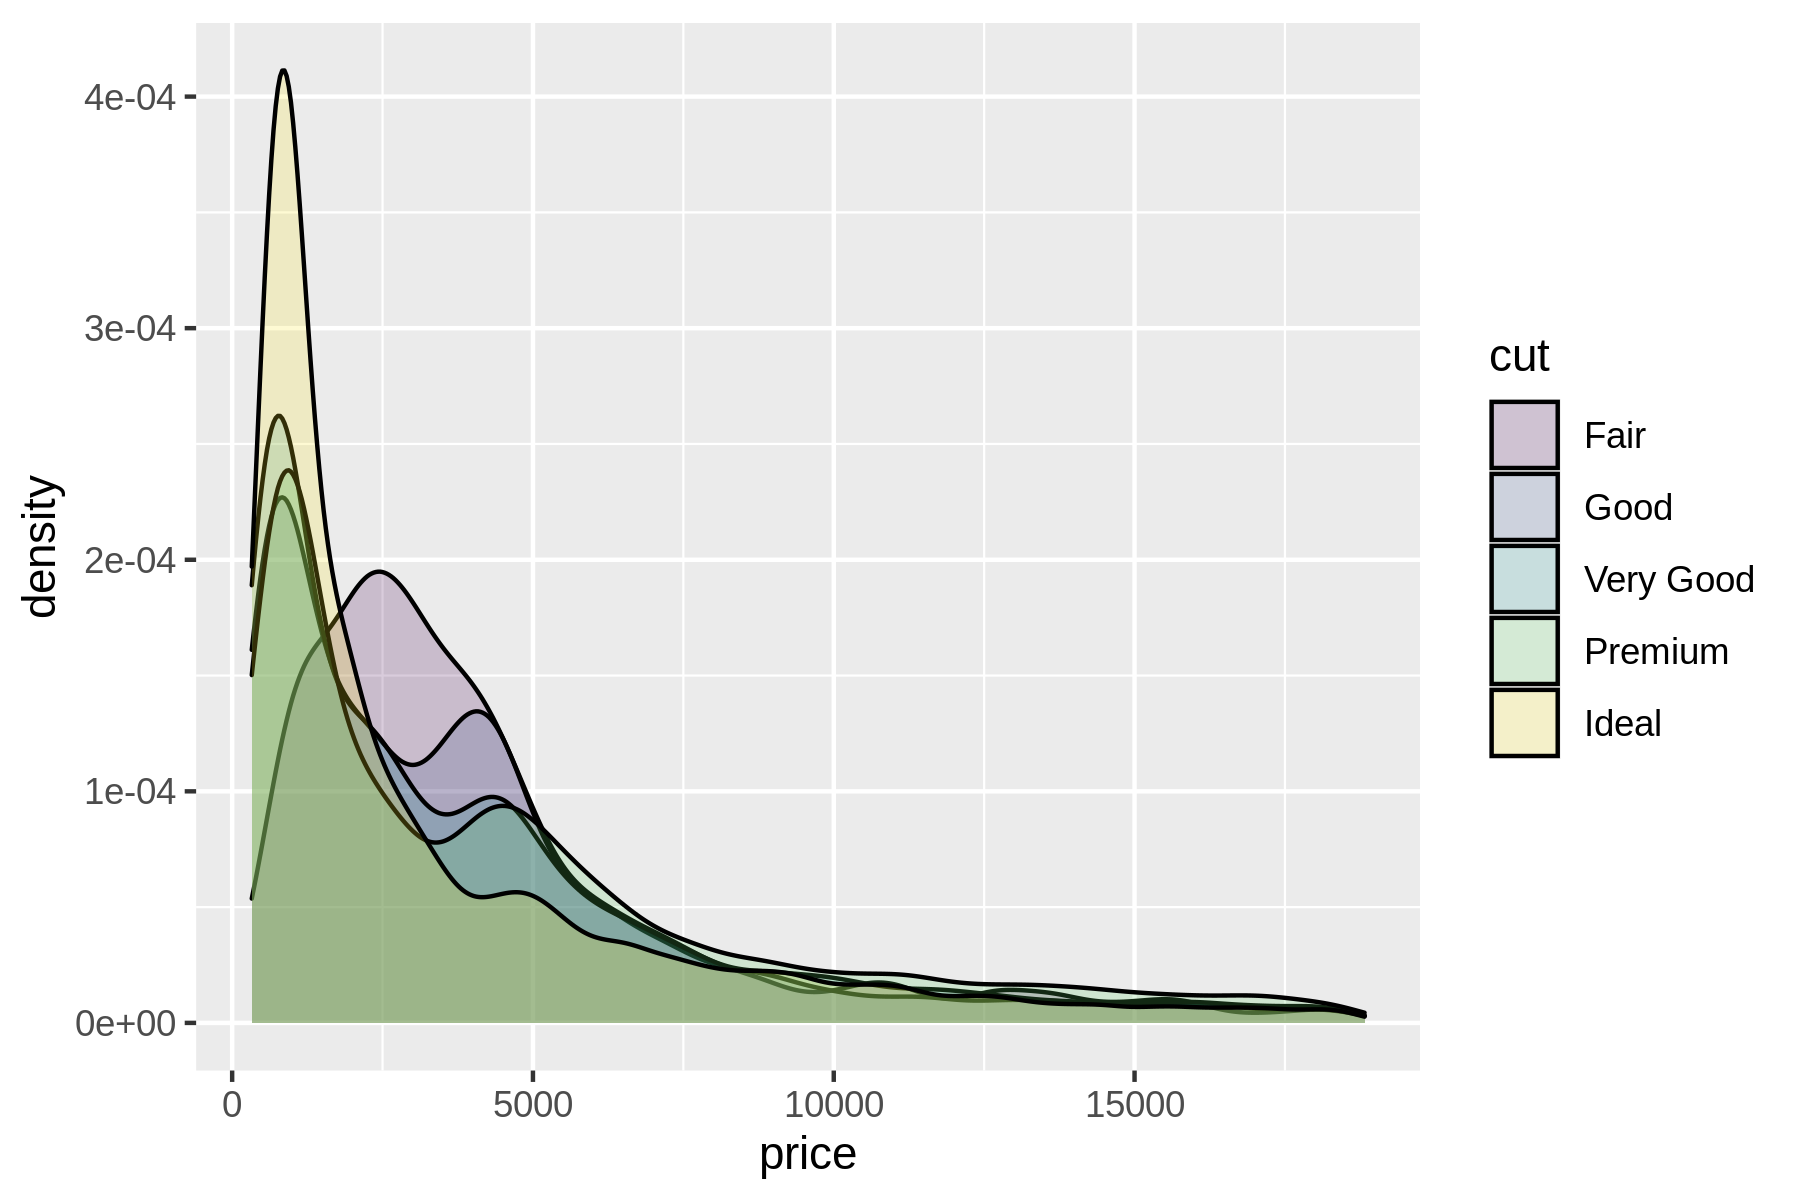

In [40]:
# we can group data with a line. 
p = ggplot(diamonds, aes(x = price, fill = cut)) 
p = p + geom_density(alpha = 0.2) 
p 